# Linear Regression Assignment

#### Done by Gopika GS

# Reading and Understanding the Data

 Importing the libraries and reading the data set

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bike_df=pd.read_csv("day.csv")

In [4]:
bike_df.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


Inspecting the bike dataframe

In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All the columns have 730 non null count which matches with the total rows of 730 so that we can conclude that the bike_df has 0 null values

In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising the data

In [8]:
#importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns

Visualising the numeric variables

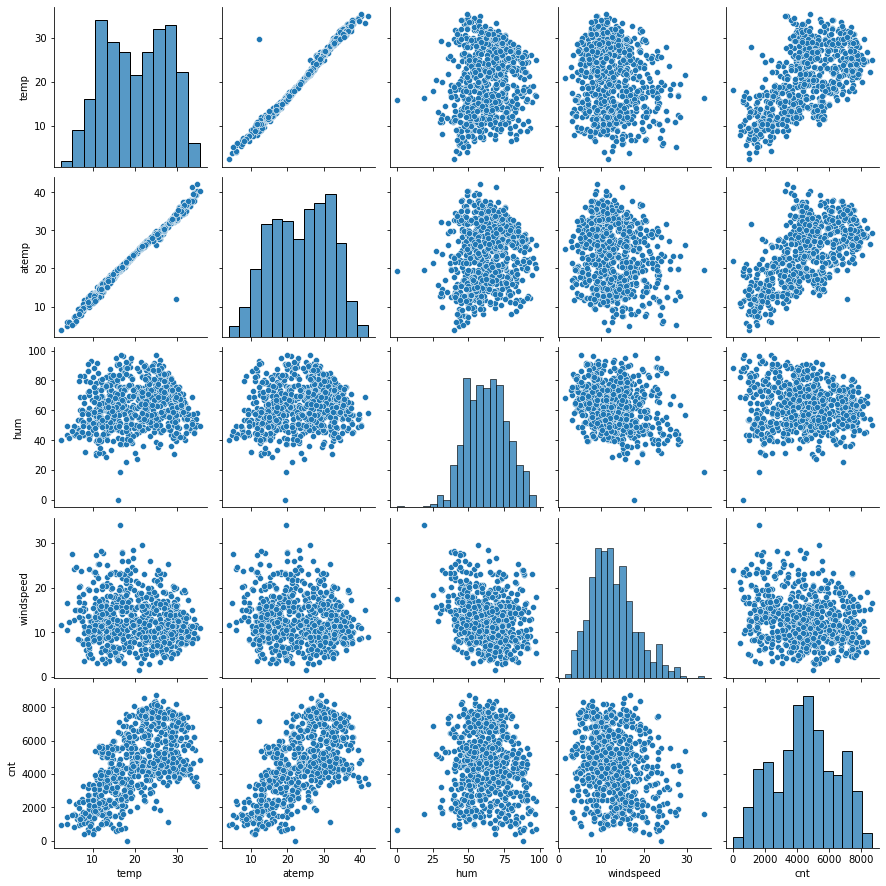

In [9]:
sns.pairplot(data=bike_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

Visualising the Categorical Data

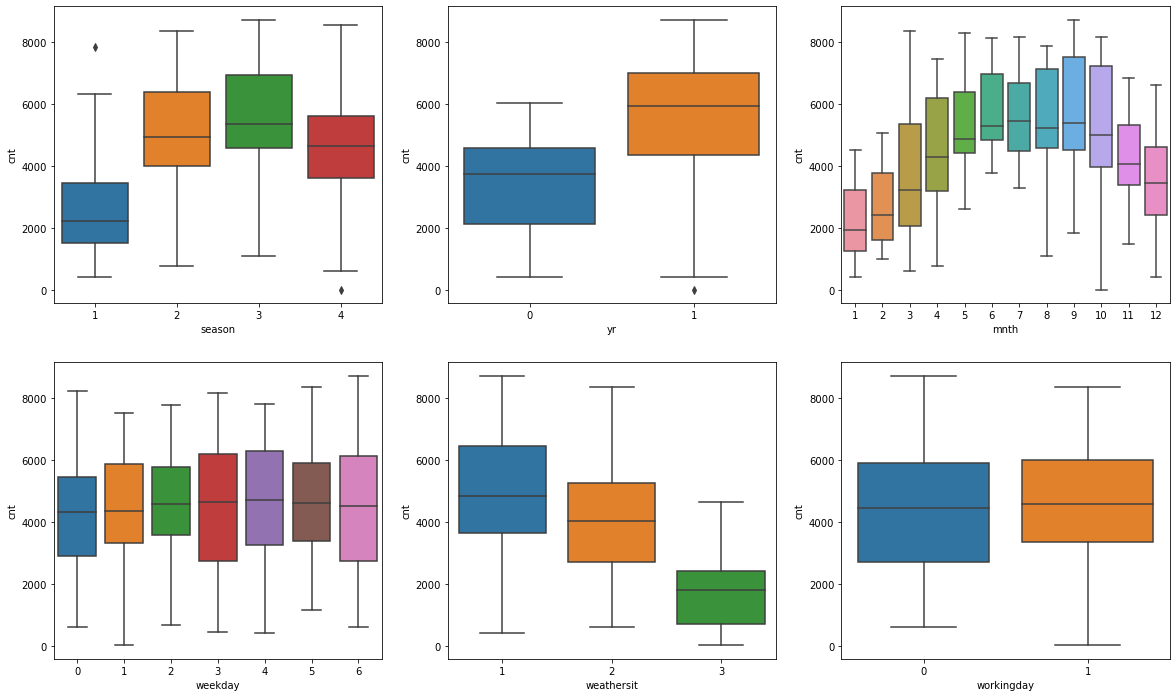

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()

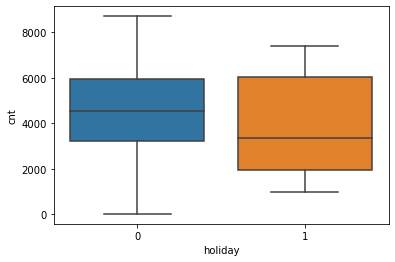

In [11]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.show()

## Data Preparation

In [12]:
#droping columns
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
#mapping some categorical data for better readability of dataframe
#mapping season
bike_df.season=bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [14]:
#mapping month
import calendar as cal
bike_df.mnth=bike_df.mnth.apply(lambda x:cal.month_abbr[x])

In [15]:
#mapping weathersit
bike_df.weathersit=bike_df.weathersit.map({1:'clear/fewClouds',2:'Mist&Cloudy',
                                           3:'lightSnow/lightRain&thunderstrom',4:'heavyRain&Ice&thunderstorm'})

In [16]:
#mapping weekday
bike_df.weekday=bike_df.weekday.map({2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',0:'Sunday',1:'Monday'})

In [17]:
bike_df.head(15)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clear/fewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clear/fewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clear/fewClouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Thursday,1,clear/fewClouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Friday,1,Mist&Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Saturday,0,Mist&Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Sunday,0,clear/fewClouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Monday,1,clear/fewClouds,6.184153,7.54440,48.2917,14.958889,1321


### Adding Dummy Variables

In [18]:
dummy=pd.get_dummies(bike_df[['season','mnth','weekday','weathersit']],drop_first = True)

In [19]:
dummy

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear/fewClouds,weathersit_lightSnow/lightRain&thunderstrom
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
bike_df=pd.concat([bike_df,dummy],axis=1)

In [21]:
bike_df.head(15)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear/fewClouds,weathersit_lightSnow/lightRain&thunderstrom
0,spring,0,Jan,0,Saturday,0,Mist&Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,0
1,spring,0,Jan,0,Sunday,0,Mist&Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,Jan,0,Monday,1,clear/fewClouds,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,1,0
3,spring,0,Jan,0,Tuesday,1,clear/fewClouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,1,0
4,spring,0,Jan,0,Wednesday,1,clear/fewClouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,1,0
5,spring,0,Jan,0,Thursday,1,clear/fewClouds,8.378268,11.66045,51.8261,...,0,0,0,0,0,1,0,0,1,0
6,spring,0,Jan,0,Friday,1,Mist&Cloudy,8.057402,10.44195,49.8696,...,0,0,0,0,0,0,0,0,0,0
7,spring,0,Jan,0,Saturday,0,Mist&Cloudy,6.765000,8.11270,53.5833,...,0,0,0,1,0,0,0,0,0,0
8,spring,0,Jan,0,Sunday,0,clear/fewClouds,5.671653,5.80875,43.4167,...,0,0,0,0,1,0,0,0,1,0
9,spring,0,Jan,0,Monday,1,clear/fewClouds,6.184153,7.54440,48.2917,...,0,0,1,0,0,0,0,0,1,0


In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   season                                       730 non-null    object 
 1   yr                                           730 non-null    int64  
 2   mnth                                         730 non-null    object 
 3   holiday                                      730 non-null    int64  
 4   weekday                                      730 non-null    object 
 5   workingday                                   730 non-null    int64  
 6   weathersit                                   730 non-null    object 
 7   temp                                         730 non-null    float64
 8   atemp                                        730 non-null    float64
 9   hum                                          730 non-null    float64
 10  wi

In [23]:
#removing season,weathersit,mnth,weekay
bike_df.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)


In [24]:
bike_df.head(15)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear/fewClouds,weathersit_lightSnow/lightRain&thunderstrom
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,1,0,...,0,0,0,0,0,1,0,0,1,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,1,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,1,0,0,0,1,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   yr                                           730 non-null    int64  
 1   holiday                                      730 non-null    int64  
 2   workingday                                   730 non-null    int64  
 3   temp                                         730 non-null    float64
 4   atemp                                        730 non-null    float64
 5   hum                                          730 non-null    float64
 6   windspeed                                    730 non-null    float64
 7   cnt                                          730 non-null    int64  
 8   season_spring                                730 non-null    uint8  
 9   season_summer                                730 non-null    uint8  
 10  se

## Splitting the Data into  Training and Test Sets

In [26]:
#importing libraries
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   yr                                           219 non-null    int64  
 1   holiday                                      219 non-null    int64  
 2   workingday                                   219 non-null    int64  
 3   temp                                         219 non-null    float64
 4   atemp                                        219 non-null    float64
 5   hum                                          219 non-null    float64
 6   windspeed                                    219 non-null    float64
 7   cnt                                          219 non-null    int64  
 8   season_spring                                219 non-null    uint8  
 9   season_summer                                219 non-null    uint8  
 10  s

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   yr                                           510 non-null    int64  
 1   holiday                                      510 non-null    int64  
 2   workingday                                   510 non-null    int64  
 3   temp                                         510 non-null    float64
 4   atemp                                        510 non-null    float64
 5   hum                                          510 non-null    float64
 6   windspeed                                    510 non-null    float64
 7   cnt                                          510 non-null    int64  
 8   season_spring                                510 non-null    uint8  
 9   season_summer                                510 non-null    uint8  
 10  s

## Rescaling the features


In [28]:
#import libraries
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
#Applying scaler to the numerical columns

In [31]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
#scaling test data
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [32]:
df_train.head(15)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear/fewClouds,weathersit_lightSnow/lightRain&thunderstrom
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0
580,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559,0,0,...,0,0,0,1,0,0,0,0,1,0
500,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588,0,1,...,0,0,0,0,0,0,0,1,1,0
479,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308,0,1,...,0,0,0,0,0,0,0,1,1,0
472,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885,0,1,...,0,0,0,0,0,0,0,1,0,0


In [33]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear/fewClouds,weathersit_lightSnow/lightRain&thunderstrom
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


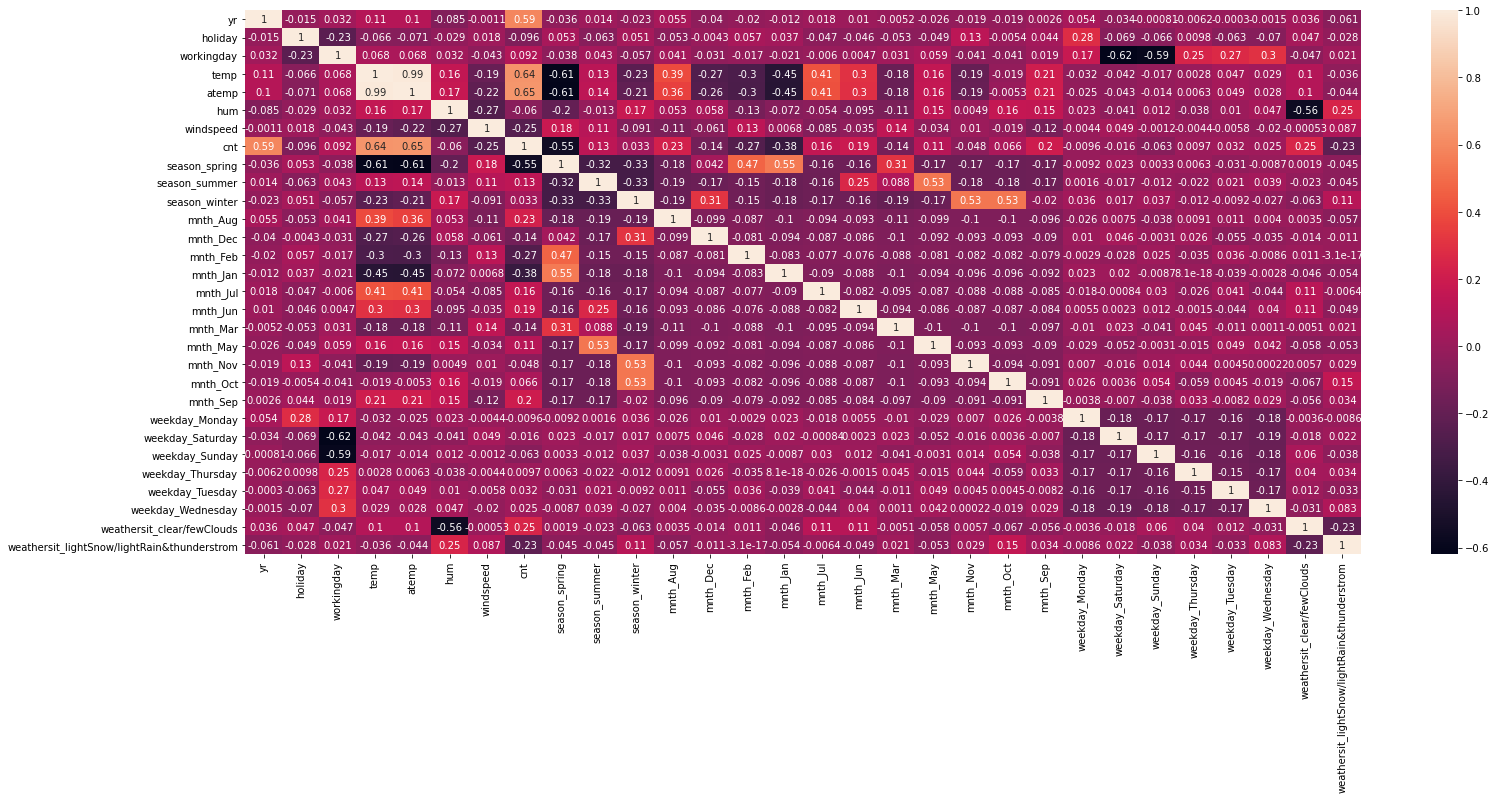

In [34]:
#Checking correlation

plt.figure(figsize = (25,10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

## Dividing in to X and Y sets for model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 14)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 7),
 ('mnth_May', False, 12),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', False, 14),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 16),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_clear/fewClouds', True, 1),
 ('weathersit_lightSnow/lightRain&thunderstrom', True, 1)]

## Model 1

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Aug', 'mnth_Jul', 'mnth_Jun',
       'weekday_Saturday', 'weathersit_clear/fewClouds',
       'weathersit_lightSnow/lightRain&thunderstrom'],
      dtype='object')

In [40]:

X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [41]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
#linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.34e-190
Time:                        23:24:24   Log-Likelihood:                 513.88
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     495   BIC:                            -934.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [44]:
#lm = sm.OLS(y_train,X_train_new).fit()
#summary of  linear model
#print(lm.summary())

In [45]:
#X_train_new.columns

In [46]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,23.69
4,hum,19.48
2,workingday,5.24
5,windspeed,4.24
12,weathersit_clear/fewClouds,3.24
6,season_spring,2.84
7,season_winter,2.26
0,yr,2.07
11,weekday_Saturday,1.95
9,mnth_Jul,1.78


In [48]:
#droping temp due to high VIF

In [49]:
X_train_new = X_train_new.drop(['temp'], axis=1)

## Model 2



In [50]:
X_train_new = sm.add_constant(X_train_new)
#linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary of  linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     120.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          3.06e-144
Time:                        23:24:25   Log-Likelihood:                 402.18
No. Observations:                 510   AIC:                            -776.4
Df Residuals:                     496   BIC:                            -717.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [51]:
#removing hum due to high p value
X_train_new = X_train_new.drop(["hum"], axis = 1)

### Model 3

In [52]:
#linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary of  linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     130.9
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.82e-145
Time:                        23:24:25   Log-Likelihood:                 402.10
No. Observations:                 510   AIC:                            -778.2
Df Residuals:                     497   BIC:                            -723.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [53]:
#removing holiday due to high p value
X_train_new = X_train_new.drop(['holiday'], axis=1)

### Model 4

In [54]:

#linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary of  linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.07e-146
Time:                        23:24:26   Log-Likelihood:                 401.29
No. Observations:                 510   AIC:                            -778.6
Df Residuals:                     498   BIC:                            -727.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [55]:
#removing month july due to high p value
X_train_new = X_train_new.drop(['mnth_Jul'], axis=1)

In [56]:
X_train_new = X_train_new.drop(['const'], axis=1)

### Model 5

### Final Model

In [57]:
X_train_lm = sm.add_constant(X_train_new)
#linear model
lm = sm.OLS(y_train,X_train_lm).fit()
#summary of  linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          9.64e-147
Time:                        23:24:26   Log-Likelihood:                 400.37
No. Observations:                 510   AIC:                            -778.7
Df Residuals:                     499   BIC:                            -732.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [58]:
#X_train_new = X_train_new.drop(['const'], axis=1)
#calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.67
1,workingday,3.23
8,weathersit_clear/fewClouds,2.47
0,yr,1.92
3,season_spring,1.64
7,weekday_Saturday,1.56
4,season_winter,1.53
5,mnth_Aug,1.24
6,mnth_Jun,1.20
9,weathersit_lightSnow/lightRain&thunderstrom,1.11


## Residual Analysis of Train Data

In [59]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

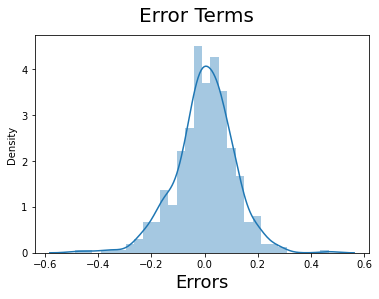

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 

Error terms are normally distributed

## Making predictions

### Dividing in to x test and y test

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test
#df_test.info()cc

In [62]:

# Creating X_test_new dataframe 
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [63]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.7189944591690778

### Model Evaluation

Text(0, 0.5, 'y_pred')

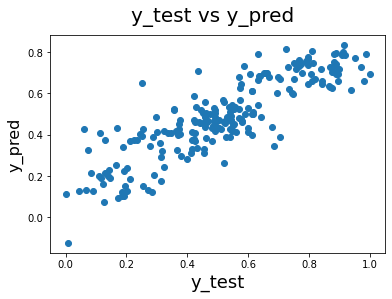

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

In [66]:
lm.params.sort_values(ascending=False)

const                                          0.419230
yr                                             0.247068
weathersit_clear/fewClouds                     0.090265
weekday_Saturday                               0.062389
workingday                                     0.055790
mnth_Jun                                       0.049048
mnth_Aug                                       0.046972
season_winter                                 -0.041714
windspeed                                     -0.192876
weathersit_lightSnow/lightRain&thunderstrom   -0.197202
season_spring                                 -0.268305
dtype: float64

We can conclude that the equation for best  fitted line is

Cnt=0.419230 + 0.247068*yr + 0.090265*weathersit_clear/fewClouds + 0.062389*weekday_Saturday + 0.055790*workingday + 0.049048*mnth_Jun + 0.046972*mnth_Aug - 0.041714*season_winter - 0.192876*windspeed - 0.197202*weathersit_lightSnow/lightRain&thunderstrom - 0.268305*season_spring 

##### An increase in the values of variables with positive coefficients will tend to increase the value of cnt and an increase in the values of varaibles with negative coefficients will decrease the value of cnt

 
- June month will have more cnt
- Bike rentals will be less on windy days,days having light rain & thunderstorm or light snow

We can infere that the month,holidays and weather has an impact on the count of bike rentals